In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
# Read Titanic Data
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


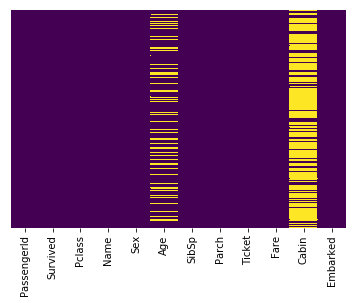

In [65]:
#Heatmap of missing values
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [66]:
#Count missing Ages
sum(train['Age'].isnull())

177

In [67]:
train['TotalSize'] = train['SibSp'] + train['Parch']
test['TotalSize'] = test['SibSp'] + test['Parch']

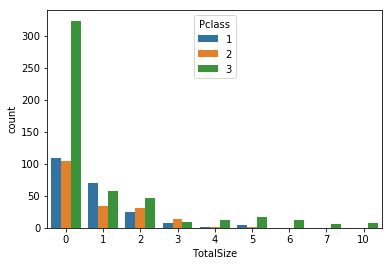

In [68]:
sns.countplot(x='TotalSize', hue='Pclass' ,data=train)

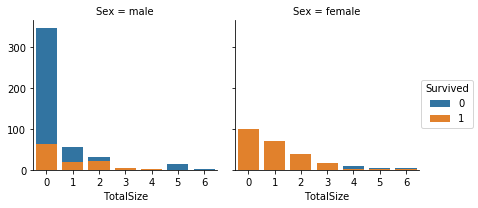

In [69]:
g=sns.FacetGrid(data=train, hue='Survived',col='Sex')
g.map(sns.countplot,'TotalSize').add_legend()

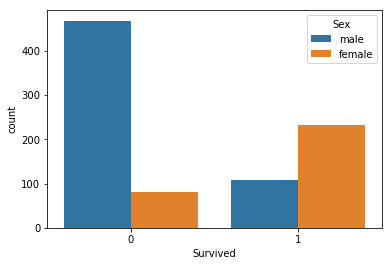

In [70]:
sns.countplot(x='Survived', hue='Sex', data=train)

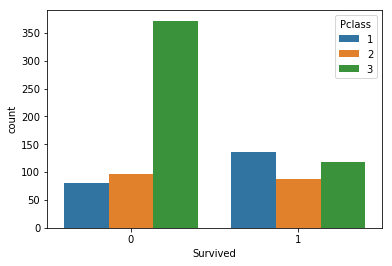

In [71]:
sns.countplot(x='Survived', hue='Pclass', data=train)

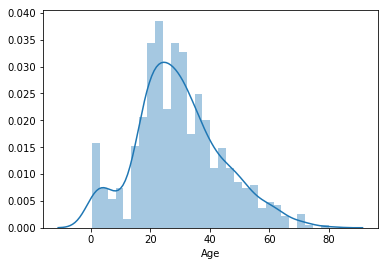

In [72]:
sns.distplot(train['Age'].dropna(), bins=30)

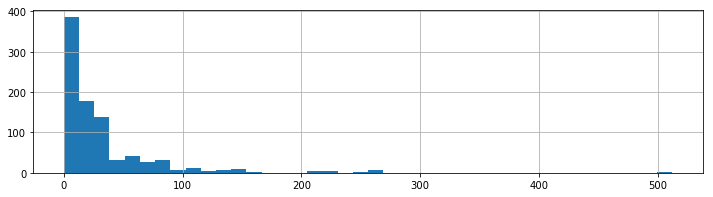

In [73]:
train['Fare'].hist(bins=40, figsize=(12,3))

In [74]:
#Impute missing ages
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
            if Pclass == 1:
                return 37
            elif Pclass == 2:
                return 29
            else: 
                return 24
    else:
         return Age

In [75]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis=1)

In [76]:
test['Age'].isnull().sum()

0

In [77]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [78]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [79]:
#Dummy Encoding
sex_tr=pd.get_dummies(train['Sex'], drop_first=True,)
emb_tr = pd.get_dummies(train['Embarked'],drop_first=True)

sex_ts = pd.get_dummies(test['Sex'], drop_first=True,)
emb_ts = pd.get_dummies(test['Embarked'],drop_first=True)

In [80]:
train = pd.concat([train,sex_tr,emb_tr],axis=1)
test = pd.concat([test,sex_ts,emb_ts],axis=1)

In [81]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TotalSize,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0


In [82]:
#Remove cols not used in the model
train.drop(['Name', 'Sex','Embarked', 'PassengerId','SibSp','Parch', 'Ticket'], axis=1, inplace=True)
test.drop(['Name', 'Sex','Embarked', 'PassengerId','SibSp','Parch', 'Ticket'], axis=1, inplace=True)

In [83]:
train.head(2)

,Survived,Pclass,Age,Fare,TotalSize,male,Q,S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0


In [84]:
test.head(2)

,Pclass,Age,Fare,TotalSize,male,Q,S
0,3,34.5,7.8292,0,1,1,0
1,3,47.0,7.0000,1,0,0,1


In [85]:
from sklearn.cross_validation import train_test_split

In [86]:
x_tr = train.drop('Survived', axis=1)
y_tr = train['Survived']


In [87]:
#x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
logmodel = LogisticRegression()

In [90]:
logmodel.fit(x_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
y_pred = logmodel.predict(test)
y_pred_tr = logmodel.predict(x_tr)

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_tr,y_pred_tr))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       549
          1       0.78      0.69      0.73       340

avg / total       0.81      0.81      0.80       889



In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
print(confusion_matrix(y_tr,y_pred_tr))

[[484  65]
 [106 234]]
